In [1]:
from manim import *
import numpy as np
from numpy import linalg as LA
import math
from scipy.stats import bernoulli

Manim Community v0.18.0

In [ ]:
#note that in insight many of the following codes could have been optimized, or functions could have been defined. At the moment of implementation
# I had no idea exactly what I wanted to do.

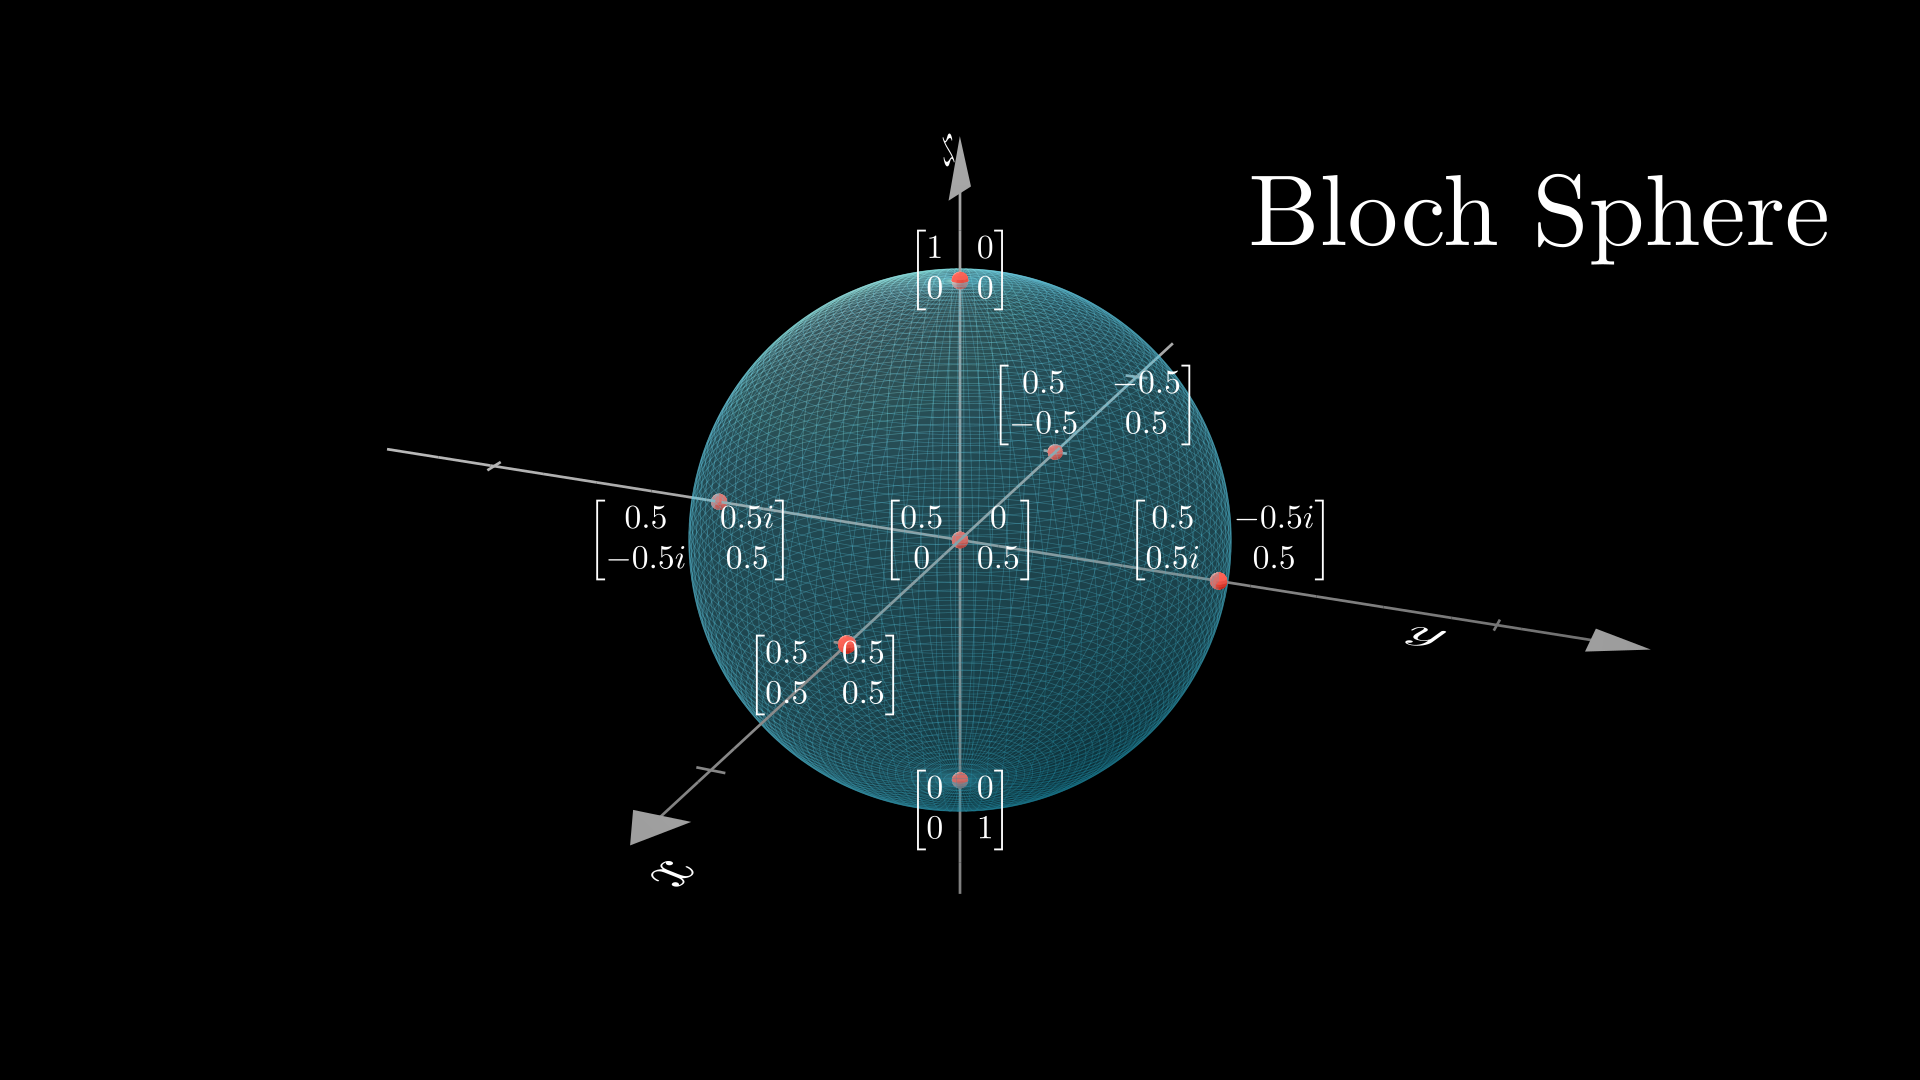

In [113]:
class ExampleSphere(ThreeDScene):
    def construct(self):
        self.set_camera_orientation(phi=3*PI / 8, theta= PI / 8)
        sphere = Sphere(
            center=(0, 0, 0),
            radius=2,
            resolution=(50, 50),
        ).set_opacity(0.2)
        sphere.set_color(BLUE)
        self.add(sphere)

        axis=ThreeDAxes(x_range=(- 5, 5, 2), y_range=(- 5, 5, 2), z_range=(- 3, 3, 2),
                        x_length=10,y_length=10,z_length=6).set_color(GRAY)
        self.add(axis)

        a_label=axis.get_axis_labels(x_label="x",y_label="y",z_label="z")
        self.add(a_label)

        point0=Dot3D([0,0,0],radius=0.06).set_color(RED)
        pointx1=Dot3D([2,0,0],radius=0.06).set_color(RED)
        pointx2=Dot3D([-2,0,0],radius=0.06).set_color(RED)
        pointy1=Dot3D([0,2,0],radius=0.06).set_color(RED)
        pointy2=Dot3D([0,-2,0],radius=0.06).set_color(RED)
        pointz1=Dot3D([0,0,2],radius=0.06).set_color(RED)
        pointz2=Dot3D([0,0,-2],radius=0.06).set_color(RED)

        self.add(point0,pointx1,pointx2,pointy1,pointy2,pointz1,pointz2)

        label0=Tex(r"$\begin{bmatrix} 0.5 & 0 \\ 0 & 0.5 \end{bmatrix}$").move_to([0,0,0]).scale(0.5)
        labelx1=Tex(r"$\begin{bmatrix} 0.5 & 0.5 \\ 0.5 & 0.5 \end{bmatrix}$").move_to([-1,-1,0]).scale(0.5)
        labelx2=Tex(r"$\begin{bmatrix} 0.5 & -0.5 \\ -0.5 & 0.5 \end{bmatrix}$").move_to([1,1,0]).scale(0.5)
        labely1=Tex(r"$\begin{bmatrix} 0.5 & 0.5i \\ -0.5i & 0.5 \end{bmatrix}$").move_to([-2,0,0]).scale(0.5)
        labely2=Tex(r"$\begin{bmatrix} 0.5 & -0.5i \\ 0.5i & 0.5 \end{bmatrix}$").move_to([2,0,0]).scale(0.5)
        labelz1=Tex(r"$\begin{bmatrix} 1 & 0 \\ 0 & 0 \end{bmatrix}$").move_to([0,2,0]).scale(0.5)
        labelz2=Tex(r"$\begin{bmatrix} 0 & 0 \\ 0 & 1 \end{bmatrix}$").move_to([0,-2,0]).scale(0.5)

        self.add_fixed_in_frame_mobjects(label0,labelx1,labelx2,labely1,labely2,labelz1,labelz2)
        
        title=Tex("Bloch Sphere").to_edge(UP+RIGHT,buff=1.4).scale(1.5)
        self.add_fixed_in_frame_mobjects(title)





%manim -ql -v WARNING ExampleSphere

In [2]:
sx=np.matrix(np.array([[0.0,1.0],[1.0,0.0]],dtype="complex"))
sy=np.matrix(np.array([[0.0,-1.j],[1.j,0.0]],dtype="complex"))
sz=np.matrix(np.array([[1.0,0.0],[0.0,-1.0]],dtype="complex"))
id=np.matrix(np.array([[1.0,0.0],[0.0,1.0]],dtype="complex"))

p=[sx,sy,sz]

def tranform(A,rho):
  x=np.dot(np.dot(A,rho),A.getH())
  return x/np.real(np.trace(x))
def frobenius_coordinates(state,pauli):
  return np.real(np.trace(np.matmul(state.H,pauli)))
def find_radius(cor):
  sum=0
  for i in range(len(cor)):
    sum=sum+cor[i]**2

  return sum
def purity(rad2):
  return 0.5*(1+rad2)
def prob(A,rho):
  x=np.dot(np.dot(A,rho),A.getH())
  return np.real(np.trace(x))

In [5]:
class Examplevid(ThreeDScene):
    def construct(self):
        thm=Tex(r"Quantum trajectories purifies almost surely\\ unless there exists a subspace of dimension at least two\\ on which every $\{A_i\}_i$ is proportional to a unitary operator")
        self.play(Write(thm))
        self.wait()
        self.remove(thm)

        case1=Tex(r"First case:\\  $\{A_i\}_i$ are not proportional to a unitary in any subspace.")
        self.play(Write(case1))
        self.wait()
        self.remove(case1)

        example=Tex(r"Example:\\$A_0=\begin{bmatrix} \frac{1}{2\sqrt{2}} & 0\\ 0&  \frac{1}{2} \end{bmatrix}$,$A_1=\begin{bmatrix} \frac{\sqrt{5}}{5} & \frac{-i\sqrt{5}}{10}\\ \frac{i\sqrt{5}}{10}&  \frac{3\sqrt{5}}{10} \end{bmatrix}$,\\$A_2=\begin{bmatrix}\frac{\sqrt{2}+8\sqrt{3}}{20}&\frac{-i\sqrt{2}+2i\sqrt{3}}{10}\\ \frac{i\sqrt{2}-2i\sqrt{3}}{10}&\frac{2\sqrt{2}+\sqrt{3}}{10}\end{bmatrix}$")
        self.play(Write(example))
        self.wait()
        self.remove(example)


        a_0=np.matrix([[1/(2*np.sqrt(2)),0],[0,1/2]])
        a_1=np.matrix([[np.sqrt(5)/5,np.sqrt(5)/10j],[-np.sqrt(5)/10j,3*np.sqrt(5)/10]])
        a_2=np.matrix([[np.sqrt(2)/4,-np.sqrt(2)/4j],[np.sqrt(2)/4j,np.sqrt(2)/4]])

        a=[a_0,a_1,a_2]
        rho=np.matrix([[0.5,0],[0,0.5]])


        self.set_camera_orientation(phi=3*PI / 8, theta= PI / 8)
        sphere = Sphere(
            center=(0, -2, 0),
            radius=2,
            resolution=(50, 50),
        ).set_opacity(0.2)
        sphere.set_color(BLUE)
        self.play(Write(sphere))
        self.wait()

        axis=ThreeDAxes(x_range=(- 5, 5, 2), y_range=(- 5, 5, 2), z_range=(- 3, 3, 2),
                        x_length=10,y_length=10,z_length=6).set_color(GRAY).move_to([0,-2,0])
        self.play(Write(axis))
        self.wait()

        a_label=axis.get_axis_labels(x_label="x",y_label="y",z_label="z")
        self.play(Write(a_label))
        self.wait()

        point0=Dot3D([0,-2,0],radius=0.06).set_color(RED)
        self.add(point0)
        self.wait()
        point0.generate_target()
        tr_it=ValueTracker(0)
        tr_out=ValueTracker(0)
        tr_pur=ValueTracker(0)
        it=Integer(0)
        out=Integer(0)
        pur=DecimalNumber(0.5,num_decimal_places=3)
        t_it=Text("Iteration:").to_edge(UP+RIGHT).scale(0.75)
        t_out=Text("Outcome:").next_to(t_it,DOWN).scale(0.75)
        t_pur=Text("Purity:").next_to(t_out,DOWN).scale(0.75)
        it.next_to(t_it,RIGHT)
        out.next_to(t_out,RIGHT)
        pur.next_to(t_pur,RIGHT)

        gr=VGroup(t_it,t_out,t_pur,it,out,pur)

        gr.move_to([4,2,0])

        self.add_fixed_in_frame_mobjects(t_it)
        self.add_fixed_in_frame_mobjects(it)
        self.add_fixed_in_frame_mobjects(t_out)
        self.add_fixed_in_frame_mobjects(out)
        self.add_fixed_in_frame_mobjects(t_pur)
        self.add_fixed_in_frame_mobjects(pur)
        self.wait()


        for i in range(5):
            tr_it.set_value(i+1)
            it.add_updater(lambda x: x.set_value(tr_it.get_value()))
            it.add_updater(lambda x: self.add_fixed_in_frame_mobjects(x))
            
            p_0=np.real(prob(a_0,rho))
            aut_0=np.random.binomial(n=1,p=p_0)
            outcome=0
            if(aut_0==1):
                outcome=0
            else:
                p_1=np.real(prob(a_1,rho))
                aut_1=np.random.binomial(n=1,p=p_1/(1-p_0))
                if(aut_1==1):
                    outcome=1
                else:
                    outcome=2
            

            tr_out.set_value(outcome)
            out.add_updater(lambda x: x.set_value(tr_out.get_value()))
            out.add_updater(lambda x: self.add_fixed_in_frame_mobjects(x))

            rho=tranform(a[outcome],rho)
            coor=[np.real(frobenius_coordinates(rho,pauli)) for pauli in p]
            coor_p=[2*x for x in coor]
            rad=find_radius(coor)
            pury=purity(rad)

            tr_pur.set_value(pury)
            pur.add_updater(lambda x: x.set_value(tr_pur.get_value()))
            pur.add_updater(lambda x: self.add_fixed_in_frame_mobjects(x))

            coor_p[1]=coor_p[1]-2
            point0.target.move_to(coor_p)
            self.play(MoveToTarget(point0),run_time=0.5)

        for i in range(5,95):
            tr_it.set_value(i+1)
            it.add_updater(lambda x: x.set_value(tr_it.get_value()))
            it.add_updater(lambda x: self.add_fixed_in_frame_mobjects(x))
            
            p_0=np.real(prob(a_0,rho))
            aut_0=np.random.binomial(n=1,p=p_0)
            outcome=0
            if(aut_0==1):
                outcome=0
            else:
                p_1=np.real(prob(a_1,rho))
                aut_1=np.random.binomial(n=1,p=p_1/(1-p_0))
                if(aut_1==1):
                    outcome=1
                else:
                    outcome=2

            tr_out.set_value(outcome)
            out.add_updater(lambda x: x.set_value(tr_out.get_value()))
            out.add_updater(lambda x: self.add_fixed_in_frame_mobjects(x))

            rho=tranform(a[outcome],rho)
            coor=[np.real(frobenius_coordinates(rho,pauli)) for pauli in p]
            coor_p=[2*x for x in coor]
            rad=find_radius(coor)
            pury=purity(rad)

            tr_pur.set_value(pury)
            pur.add_updater(lambda x: x.set_value(tr_pur.get_value()))
            pur.add_updater(lambda x: self.add_fixed_in_frame_mobjects(x))

            coor_p[1]=coor_p[1]-2
            point0.target.move_to(coor_p)
            self.play(MoveToTarget(point0),run_time=0.01)

        for i in range(95,100):
            tr_it.set_value(i+1)
            it.add_updater(lambda x: x.set_value(tr_it.get_value()))
            it.add_updater(lambda x: self.add_fixed_in_frame_mobjects(x))
            
            p_0=np.real(prob(a_0,rho))
            aut_0=np.random.binomial(n=1,p=p_0)
            outcome=0
            if(aut_0==1):
                outcome=0
            else:
                p_1=np.real(prob(a_1,rho))
                aut_1=np.random.binomial(n=1,p=p_1/(1-p_0))
                if(aut_1==1):
                    outcome=1
                else:
                    outcome=2

            tr_out.set_value(outcome)
            out.add_updater(lambda x: x.set_value(tr_out.get_value()))
            out.add_updater(lambda x: self.add_fixed_in_frame_mobjects(x))

            rho=tranform(a[outcome],rho)
            coor=[np.real(frobenius_coordinates(rho,pauli)) for pauli in p]
            coor_p=[2*x for x in coor]
            rad=find_radius(coor)
            pury=purity(rad)

            tr_pur.set_value(pury)
            pur.add_updater(lambda x: x.set_value(tr_pur.get_value()))
            pur.add_updater(lambda x: self.add_fixed_in_frame_mobjects(x))

            coor_p[1]=coor_p[1]-2
            point0.target.move_to(coor_p)
            self.play(MoveToTarget(point0),run_time=0.5)

            self.wait()

        self.remove(point0)
        self.remove(sphere)
        self.remove(axis)
        self.remove(a_label)
        self.remove(t_it,t_out,t_pur,it,out,pur)

        self.wait()

        self.set_camera_orientation(phi=0, theta= -1.5707963267948966)


        outc=Tex(r"Conslusions:\\ As expected the trajectory purifies")
        self.play(Write(outc))
        self.wait()
        self.remove(outc)


        case2=Tex(r"Second case:\\ There exists a subspace of dimensions at least two\\ on which every $\{A_i\}_i$ is proportional to a unitary operator")
        self.play(Write(case2))
        self.wait()
        self.remove(case2)

        example=Tex(r"Example:\\ $A_0=\begin{bmatrix} \frac{\sqrt{2}}{4} & -\frac{\sqrt{2}}{4} \\ \frac{\sqrt{2}}{4} & \frac{\sqrt{2}}{4} \end{bmatrix}$,$A_1=\begin{bmatrix} \frac{\sqrt{3}}{4\sqrt{2}} & \frac{3i}{4\sqrt{2}} \\ \frac{3i}{4\sqrt{2}} & \frac{\sqrt{3}}{4\sqrt{2}} \end{bmatrix}$,$A_2=\begin{bmatrix} \frac{3i}{4\sqrt{2}}&-\frac{\sqrt{3}}{4\sqrt{2}} \\ \frac{\sqrt{3}}{4\sqrt{2}} & \frac{-3i}{4\sqrt{2}} \end{bmatrix}$")
        self.play(Write(example))
        self.wait()
        self.remove(example)


        a_0=np.matrix([[1/np.sqrt(2),-1/np.sqrt(2)],[1/np.sqrt(2),1/np.sqrt(2)]])/2
        a_1=np.sqrt(3/2)*np.matrix([[1/2,np.sqrt(3)/2j],[np.sqrt(3)/2j,1/2]])/2
        a_2=np.sqrt(3/2)*np.matrix([[np.sqrt(3)/2j,-1/2],[1/2,-np.sqrt(3)/2j]])/2

        a=[a_0,a_1,a_2]
        rho=np.matrix([[0.5,1/4j],[-1/4j,0.5]])


        self.set_camera_orientation(phi=3*PI / 8, theta= PI / 8)
        sphere = Sphere(
            center=(0, -2, 0),
            radius=2,
            resolution=(50, 50),
        ).set_opacity(0.2)
        sphere.set_color(BLUE)
        self.play(Write(sphere))
        self.wait()

        axis=ThreeDAxes(x_range=(- 5, 5, 2), y_range=(- 5, 5, 2), z_range=(- 3, 3, 2),
                        x_length=10,y_length=10,z_length=6).set_color(GRAY).move_to([0,-2,0])
        self.play(Write(axis))
        self.wait()

        a_label=axis.get_axis_labels(x_label="x",y_label="y",z_label="z")
        self.play(Write(a_label))
        self.wait()

        coor=[np.real(frobenius_coordinates(rho,pauli)) for pauli in p]

        coor_p=[2*x for x in coor]
        coor_p[1]=coor_p[1]-2
        rad=find_radius(coor)
        pury=purity(rad)


        point0=Dot3D(coor_p,radius=0.06).set_color(RED)
        self.add(point0)
        self.wait()
        point0.generate_target()
        tr_it=ValueTracker(0)
        tr_out=ValueTracker(0)
        tr_pur=ValueTracker(0)
        it=Integer(0)
        out=Integer(0)
        pur=DecimalNumber(pury,num_decimal_places=3)
        t_it=Text("Iteration:").to_edge(UP+RIGHT).scale(0.75)
        t_out=Text("Outcome:").next_to(t_it,DOWN).scale(0.75)
        t_pur=Text("Purity:").next_to(t_out,DOWN).scale(0.75)
        it.next_to(t_it,RIGHT)
        out.next_to(t_out,RIGHT)
        pur.next_to(t_pur,RIGHT)

        gr=VGroup(t_it,t_out,t_pur,it,out,pur)

        gr.move_to([4,2,0])

        self.add_fixed_in_frame_mobjects(t_it)
        self.add_fixed_in_frame_mobjects(it)
        self.add_fixed_in_frame_mobjects(t_out)
        self.add_fixed_in_frame_mobjects(out)
        self.add_fixed_in_frame_mobjects(t_pur)
        self.add_fixed_in_frame_mobjects(pur)
        self.wait()


        for i in range(5):
            tr_it.set_value(i+1)
            it.add_updater(lambda x: x.set_value(tr_it.get_value()))
            it.add_updater(lambda x: self.add_fixed_in_frame_mobjects(x))
            
            p_0=np.real(prob(a_0,rho))
            aut_0=np.random.binomial(n=1,p=p_0)
            outcome=0
            if(aut_0==1):
                outcome=0
            else:
                p_1=np.real(prob(a_1,rho))
                aut_1=np.random.binomial(n=1,p=p_1/(1-p_0))
                if(aut_1==1):
                    outcome=1
                else:
                    outcome=2
            

            tr_out.set_value(outcome)
            out.add_updater(lambda x: x.set_value(tr_out.get_value()))
            out.add_updater(lambda x: self.add_fixed_in_frame_mobjects(x))

            rho=tranform(a[outcome],rho)
            coor=[np.real(frobenius_coordinates(rho,pauli)) for pauli in p]
            coor_p=[2*x for x in coor]
            rad=find_radius(coor)
            pury=purity(rad)

            tr_pur.set_value(pury)
            pur.add_updater(lambda x: x.set_value(tr_pur.get_value()))
            pur.add_updater(lambda x: self.add_fixed_in_frame_mobjects(x))

            coor_p[1]=coor_p[1]-2
            point0.target.move_to(coor_p)
            self.play(MoveToTarget(point0),run_time=0.5)

        for i in range(5,95):
            tr_it.set_value(i+1)
            it.add_updater(lambda x: x.set_value(tr_it.get_value()))
            it.add_updater(lambda x: self.add_fixed_in_frame_mobjects(x))
            
            p_0=np.real(prob(a_0,rho))
            aut_0=np.random.binomial(n=1,p=p_0)
            outcome=0
            if(aut_0==1):
                outcome=0
            else:
                p_1=np.real(prob(a_1,rho))
                aut_1=np.random.binomial(n=1,p=p_1/(1-p_0))
                if(aut_1==1):
                    outcome=1
                else:
                    outcome=2

            tr_out.set_value(outcome)
            out.add_updater(lambda x: x.set_value(tr_out.get_value()))
            out.add_updater(lambda x: self.add_fixed_in_frame_mobjects(x))

            rho=tranform(a[outcome],rho)
            coor=[np.real(frobenius_coordinates(rho,pauli)) for pauli in p]
            coor_p=[2*x for x in coor]
            rad=find_radius(coor)
            pury=purity(rad)

            tr_pur.set_value(pury)
            pur.add_updater(lambda x: x.set_value(tr_pur.get_value()))
            pur.add_updater(lambda x: self.add_fixed_in_frame_mobjects(x))

            coor_p[1]=coor_p[1]-2
            point0.target.move_to(coor_p)
            self.play(MoveToTarget(point0),run_time=0.01)

        for i in range(95,100):
            tr_it.set_value(i+1)
            it.add_updater(lambda x: x.set_value(tr_it.get_value()))
            it.add_updater(lambda x: self.add_fixed_in_frame_mobjects(x))
            
            p_0=np.real(prob(a_0,rho))
            aut_0=np.random.binomial(n=1,p=p_0)
            outcome=0
            if(aut_0==1):
                outcome=0
            else:
                p_1=np.real(prob(a_1,rho))
                aut_1=np.random.binomial(n=1,p=p_1/(1-p_0))
                if(aut_1==1):
                    outcome=1
                else:
                    outcome=2

            tr_out.set_value(outcome)
            out.add_updater(lambda x: x.set_value(tr_out.get_value()))
            out.add_updater(lambda x: self.add_fixed_in_frame_mobjects(x))

            rho=tranform(a[outcome],rho)
            coor=[np.real(frobenius_coordinates(rho,pauli)) for pauli in p]
            coor_p=[2*x for x in coor]
            rad=find_radius(coor)
            pury=purity(rad)

            tr_pur.set_value(pury)
            pur.add_updater(lambda x: x.set_value(tr_pur.get_value()))
            pur.add_updater(lambda x: self.add_fixed_in_frame_mobjects(x))

            coor_p[1]=coor_p[1]-2
            point0.target.move_to(coor_p)
            self.play(MoveToTarget(point0),run_time=0.5)

            self.wait()

        self.remove(point0)
        self.remove(sphere)
        self.remove(axis)
        self.remove(a_label)
        self.remove(t_it,t_out,t_pur,it,out,pur)

        self.set_camera_orientation(phi=0, theta= -1.5707963267948966)

        outc=Tex(r"Conslusions:\\ The trajectory doesn't purify")
        self.play(Write(outc))
        self.wait()
        self.remove(outc)






        






%manim -qh -v WARNING Examplevid

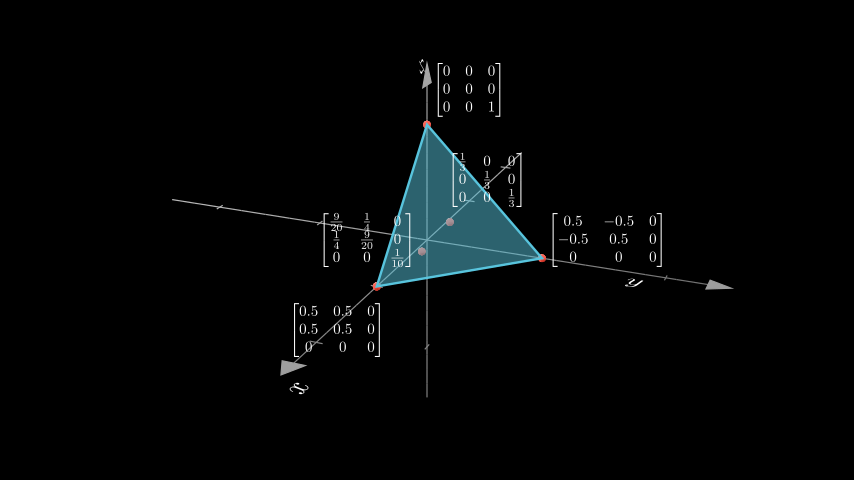

In [38]:
class ExampleSphere(ThreeDScene):
    def construct(self):
        self.set_camera_orientation(phi=3*PI / 8, theta= PI / 8)
        pos=[[2, 0, 0], [0, 2, 0], [0, 0, 2]]
        tr = Polygon(*pos,fill_color=BLUE,fill_opacity=0.5)

        self.add(tr)

        axis=ThreeDAxes(x_range=(- 5, 5, 2), y_range=(- 5, 5, 2), z_range=(- 3, 3, 2),
                        x_length=10,y_length=10,z_length=6).set_color(GRAY)
        self.add(axis)

        a_label=axis.get_axis_labels(x_label="x",y_label="y",z_label="z")
        self.add(a_label)

        pointx1=Dot3D([2,0,0],radius=0.06).set_color(RED)
        pointy1=Dot3D([0,2,0],radius=0.06).set_color(RED)
        pointz1=Dot3D([0,0,2],radius=0.06).set_color(RED)
        pointm=Dot3D([2/3,2/3,2/3],radius=0.06).set_color(RED)
        pointa=Dot3D([0.7,0.2,0.1],radius=0.06).set_color(RED)

        self.add(pointx1,pointy1,pointz1,pointm,pointa)

        label0=Tex(r"$\begin{bmatrix} 0.5 & 0.5 & 0 \\ 0.5 & 0.5 & 0\\0&0&0 \end{bmatrix}$").move_to([-1.5,-1.5,0]).scale(0.5)
        label1=Tex(r"$\begin{bmatrix} 0.5 & -0.5 & 0 \\ -0.5 & 0.5 & 0\\0&0&0 \end{bmatrix}$").move_to([3,0,0]).scale(0.5)
        label2=Tex(r"$\begin{bmatrix} 0 & 0 & 0 \\0 & 0 & 0\\0&0&1 \end{bmatrix}$").move_to([0.7,2.5,0]).scale(0.5)
        label3=Tex(r"$\begin{bmatrix} \frac{1}{3} & 0 & 0 \\ 0 & \frac{1}{3} & 0\\0&0&\frac{1}{3} \end{bmatrix}$").move_to([1,1,0]).scale(0.5)
        label4=Tex(r"$\begin{bmatrix} \frac{9}{20} & \frac{1}{4} & 0 \\ \frac{1}{4} & \frac{9}{20} & 0\\ 0&0&\frac{1}{10} \end{bmatrix}$").move_to([-1,0,0]).scale(0.5)

        self.add_fixed_in_frame_mobjects(label0,label1,label2,label3,label4)






%manim -ql -v WARNING ExampleSphere

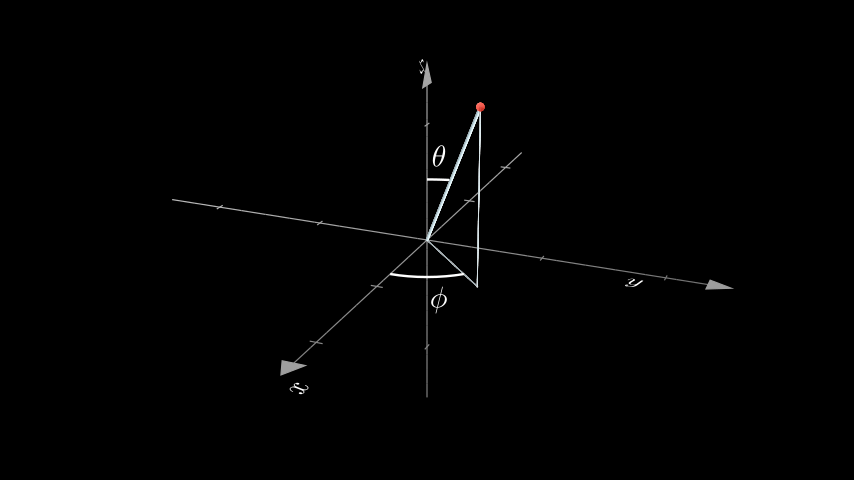

In [74]:
class ExampleSphere(ThreeDScene):
    def construct(self):
        self.set_camera_orientation(phi=3*PI / 8, theta= PI / 8)


        axis=ThreeDAxes(x_range=(- 5, 5, 2), y_range=(- 5, 5, 2), z_range=(- 3, 3, 2),
                        x_length=10,y_length=10,z_length=6).set_color(GRAY)
        self.add(axis)

        a_label=axis.get_axis_labels(x_label="x",y_label="y",z_label="z")
        self.add(a_label)

        point0=Dot3D([np.sqrt(2),np.sqrt(2),np.sqrt(8)],radius=0.06).set_color(RED)
        a=Arc(3,1.08*np.pi,0.045*np.pi)
        l0=Line3D([0,0,0],[np.sqrt(2),np.sqrt(2),np.sqrt(8)])
        point1=Dot3D([np.sqrt(2),np.sqrt(2),0],radius=0.01).set_color(WHITE)
        l1=Line3D([0,0,0],[np.sqrt(2),np.sqrt(2),0],thickness=0.005)
        l2=Line3D([np.sqrt(2),np.sqrt(2),0],[np.sqrt(2),np.sqrt(2),np.sqrt(8)],thickness=0.005)
        b=Arc(1.5,0,0.25*np.pi)
        t1=Tex(r"$\theta$").move_to([0.2,1.4,0]).scale(1)
        t2=Tex(r"$\phi$").move_to([0.2,-1,0]).scale(1)
        self.add_fixed_in_frame_mobjects(t1,t2)


        self.add(point0,point1)
        self.add(a,l0,b,l1,l2)






%manim -ql -v WARNING ExampleSphere

In [2]:
class Prova2d(ThreeDScene):
    def construct(self):
        text=Tex("Let $\mathcal{H}$ be a finite dimensional Hilbert space")
        self.play(Write(text))
        self.wait()
        self.remove(text)

        text=Tex("A quantum trajectory purifies almost surely\\\\", "unless every Kraus operator in the family $\{A_i\}_i$\\\\", "is proportional to a unitary operator in a subspace")
        self.play(Write(text))
        self.wait()
        self.remove(text)

        text=Tex("Suppose now that $\mathcal{H}$ is an infinite dimensional Hilbert space")
        self.play(Write(text))
        self.wait()
        self.remove(text)

        text=Tex("The previous result is again valid\\\\", "provided that every $A_i$ is strongly compact")
        self.play(Write(text))
        self.wait()
        self.remove(text)

        text=Tex("We will show that if $\{A_i\}_i$ is not strongly compact\\\\", "then purification might not be achieved\\\\", "even if every $A_i$ is not proportional to a unitary operator\\\\", "in a subspace")
        self.play(Write(text))
        self.wait()
        self.remove(text)

        text=Tex(r"Consider the following operators:\\$A: A\left|n\right\rangle =\frac{n}{\sqrt{2}(n+1)}\left|n+1\right\rangle$\\$B: B\left|n\right\rangle=\sqrt{1-\frac{n^2}{2(n+1)^2}}\left|n+1\right\rangle$\\ and the starting state:\\ $\rho_0=\lambda_0 \left|1\right\rangle \left\langle 1\right|+(1-\lambda_0) \left|2\right\rangle \left\langle 2\right|$\\ with $\lambda_0=0.7$")
        self.play(Write(text))
        self.wait()
        self.remove(text)


        it_tr=ValueTracker(0)

        p1=LabeledDot(Tex("$\lambda=0$",color=BLACK)).move_to([-2.5,3,0])
        p2=LabeledDot(Tex("$\lambda=1$",color=BLACK)).move_to([-2.5,-3,0])
        l=Line([-2.5,3,0],[-2.5,-3,0])

        self.play(Write(p1))
        self.play(Write(p2))
        self.play(Write(l))
        self.wait()

        circ_coor=[-2.5,0,0]


        lambda0=0.7
        omega0=0.3

        t2=Tex("Iteration: ").move_to([2.5,2,0])
        t=Tex("State: ").next_to(t2,3*DOWN)
        t1=Tex("Outcome: ").next_to(t,7*DOWN)

        it=Integer(0).next_to(t2,3*RIGHT)


        

        self.add(t2)
        self.add(t)
        self.add(t1)
        self.add(it)
        self.wait()

        rhonL=Tex(str(0.7)+r"$\left|" +str(1)+r"\right\rangle \left\langle"+str(1)+ r"\right|+"+str(0.3)+ r"\left|"+str(2)+r"\right\rangle \left\langle"+str(2)+r"\right|$").next_to(t,DOWN)



        reslam=[]
        resom=[]
        resindex=[]


        outcome=Tex("None").next_to(t1,3*RIGHT)
        state=Dot([circ_coor[0],3*(lambda0-0.5)+circ_coor[1],0]).set_color(RED)
       
        self.add(state)
        state.generate_target()
        


        self.add(rhonL)
        self.add(outcome)
        self.wait()

        for n in range(50):
            a=n*n/(2*(n+1)*(n+1))
            b=(n+1)*(n+1)/(2*(n+2)*(n+2))
            lamb1=lambda0*a
            omeg1=omega0*b
            lamb2=lambda0*(1-a)
            omeg2=omega0*(1-b)

            p=lamb1+omeg1
            res=np.random.binomial(1,p=p)
            if (res==1):
                lambda0=lamb1/(lamb1+omeg1)
                omega0=1-lambda0
                resindex.append("A")
            else:
                lambda0=lamb2/(lamb2+omeg2)
                omega0=1-lambda0
                resindex.append("B")

            reslam.append(lambda0)
            resom.append(omega0)

       


        for i in range(5):
            self.remove(t2)

            self.remove(rhonL)
            self.remove(outcome)

            outcome=Tex(resindex[i]).next_to(t1,4*RIGHT)
            self.add(outcome)
            it_tr.set_value(i+1)
            it.add_updater(lambda x: x.set_value(it_tr.get_value()))
            it.add_updater(lambda x: self.add_fixed_in_frame_mobjects(x))


            state.target.move_to([circ_coor[0],3*(resom[i]-0.5)+circ_coor[1],0])
            
            rhonL=Tex(str('%.2f'%reslam[i])+r"$\left|" +str(i+2)+r"\right\rangle \left\langle"+str(i+2)+ r"\right|+"+str('%.2f'%resom[i])+ r"\left|"+str(i+3)+r"\right\rangle \left\langle"+str(i+3)+r"\right|$").next_to(t,DOWN)

          



            self.add(t2)



            self.add(rhonL)
            
            self.play(MoveToTarget(state),run_time=0.5)

            
            self.wait()

        for i in range(5,45):
            self.remove(t2)

            self.remove(rhonL)
            self.remove(outcome)
            it_tr.set_value(i+1)
            it.add_updater(lambda x: x.set_value(it_tr.get_value()))
            it.add_updater(lambda x: self.add_fixed_in_frame_mobjects(x))

           
            rhonL=Tex(str('%.2f'%reslam[i])+r"$\left|" +str(i+2)+r"\right\rangle \left\langle"+str(i+2)+ r"\right|+"+str('%.2f'%resom[i])+ r"\left|"+str(i+3)+r"\right\rangle \left\langle"+str(i+3)+r"\right|$").next_to(t,DOWN)
            outcome=Tex(resindex[i]).next_to(t1,4*RIGHT)
           

            
            self.add(outcome)
            self.add(t2)


            self.add(rhonL)
            state.target.move_to([circ_coor[0],3*(resom[i]-0.5)+circ_coor[1],0])
            self.play(MoveToTarget(state),run_time=0.01)
        for i in range(45,50):
            self.remove(t2)

            self.remove(rhonL)
            self.remove(outcome)
            it_tr.set_value(i+1)
            it.add_updater(lambda x: x.set_value(it_tr.get_value()))
            it.add_updater(lambda x: self.add_fixed_in_frame_mobjects(x))

            state.move_to([circ_coor[0],3*(resom[i]-0.5)+circ_coor[1],0])
    
            rhonL=Tex(str('%.2f'%reslam[i])+r"$\left|" +str(i+2)+r"\right\rangle \left\langle"+str(i+2)+ r"\right|+"+str('%.2f'%resom[i])+ r"\left|"+str(i+3)+r"\right\rangle \left\langle"+str(i+3)+r"\right|$").next_to(t,DOWN)
            outcome=Tex(resindex[i]).next_to(t1,4*RIGHT)
           

            
            self.add(outcome)
            self.add(t2)
            self.add(rhonL)

            state.target.move_to([circ_coor[0],3*(resom[i]-0.5)+circ_coor[1],0])
            self.play(MoveToTarget(state),run_time=0.5)


            
            self.wait()
            self.remove(rhonL)
        self.remove(outcome)
        self.remove(state)
        self.remove(t)
        self.remove(t1)
        self.remove(t2)
        self.remove(p1)
        self.remove(p2)
        self.remove(l)
        self.remove(it)
        self.wait()

        
        text=Tex("Conslusions:\\\\", "The trajectory doesn't purify.")
        self.play(Write(text))
        self.wait()
        self.remove(text)




        




















%manim -qh -v WARNING Prova2d
